### Pyber Data Analysis
* Almost 70% of all rides and total fare values come from riders in Urban cities. 

* Riders in Rural cities tend to pay significantly higher costs per ride, but take fewer trips than Urban or Suburban riders. 

* Suburban and Rural cities compromise approximately 19% of Pyber's total driver population, but make up approximately 32% of the total rides overall. 

-----

In [55]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load 
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df, on="city")
# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [56]:
# groupby city name
city_name = merge_df.groupby("city")
# city_name.count()

# city type
city_type = city_df.set_index("city")["type"]

# average fare per city
avg_fare = city_name["fare"].mean()
avg_fare

# total rides per city
total_rides = city_name["ride_id"].count()
total_rides

# driver count per city
driver_count = city_name["driver_count"].mean()
driver_count

city_data = pd.DataFrame({
    "Type of City": city_type,
    "Total Rides": total_rides,
    "Number of Drivers": driver_count,
    "Average Fare":avg_fare,
    
})

# city_data["Average Fare"] = city_data["Average Fare"].map("${:.2f}".format)

city_data.head()


,Type of City,Total Rides,Number of Drivers,Average Fare
Amandaburgh,Urban,18,12,24.641667
Barajasview,Urban,22,26,25.332273
Barronchester,Suburban,16,11,36.422500
Bethanyland,Suburban,18,22,32.956111
Bradshawfurt,Rural,10,7,40.064000


In [57]:
# Urban dataframe
urban_df = city_data.loc[(city_data["Type of City"] == "Urban")]

urban_df.head()

,Type of City,Total Rides,Number of Drivers,Average Fare
Amandaburgh,Urban,18,12,24.641667
Barajasview,Urban,22,26,25.332273
Carriemouth,Urban,27,52,28.314444
Christopherfurt,Urban,27,41,24.501852
Deanville,Urban,19,49,25.842632


In [58]:
# Suburban dataframe
sub_df = city_data.loc[(city_data["Type of City"] == "Suburban")]

sub_df.head()

,Type of City,Total Rides,Number of Drivers,Average Fare
Barronchester,Suburban,16,11,36.422500
Bethanyland,Suburban,18,22,32.956111
Brandonfort,Suburban,19,10,35.437368
Colemanland,Suburban,22,23,30.894545
Davidfurt,Suburban,17,23,31.995882


In [59]:
# rural dataframe
rural_df = city_data.loc[(city_data["Type of City"] == "Rural")]

rural_df.head()

,Type of City,Total Rides,Number of Drivers,Average Fare
Bradshawfurt,Rural,10,7,40.064000
Garzaport,Rural,3,7,24.123333
Harringtonfort,Rural,6,4,33.470000
Jessicaport,Rural,6,1,36.013333
Lake Jamie,Rural,6,4,34.358333


## Bubble Plot of Ride Sharing Data

In [60]:
# INSTRUCTIONS

# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

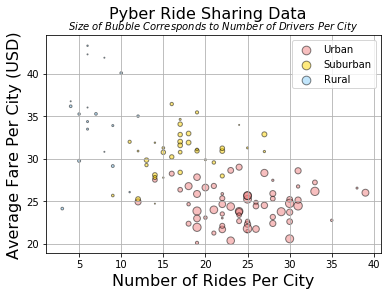

In [61]:
# scatter plots
urban_scat = plt.scatter(urban_df["Total Rides"], urban_df["Average Fare"],color="lightcoral",s=urban_df["Number of Drivers"], edgecolors="black",alpha=0.5,label="Urban")
sub_scat = plt.scatter(sub_df["Total Rides"], sub_df["Average Fare"],color="gold",s=sub_df["Number of Drivers"],edgecolors="black", alpha=0.5, label="Suburban")
rural_scat = plt.scatter(rural_df["Total Rides"], rural_df["Average Fare"],color="lightskyblue",s=rural_df["Number of Drivers"],edgecolors="black",alpha=0.5, label="Rural")


# legend and legend points
legend = plt.legend(handles=[urban_scat,sub_scat,rural_scat],loc="upper right")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# labels
plt.suptitle("Pyber Ride Sharing Data", fontsize=16)
plt.title("$\it{Size}$ $\it{of}$ $\it{Bubble}$ $\it{Corresponds}$ $\it{to}$ $\it{Number}$ $\it{of}$ $\it{Drivers}$ $\it{Per}$ $\it{City}$", fontsize=10)
plt.xlabel("Number of Rides Per City", fontsize=16)
plt.ylabel("Average Fare Per City (USD)", fontsize=16)

# grid
plt.grid(True)

# save fig
plt.savefig("pyberdatascatter.png")

plt.show()


## Total Fares by City Type

In [62]:
# INSTRUCTIONS
# Calculate Type Percents
# Build Pie Chart
# Save Figure

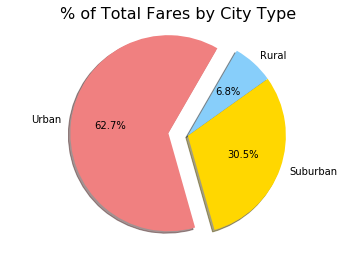

In [63]:
# used merge_df dataframe

# Urban total fares
urban_tot_fares = merge_df.loc[merge_df["type"]=="Urban", "fare"].sum()

# Suburban total fares
sub_tot_fares = merge_df.loc[merge_df["type"]=="Suburban", "fare"].sum()

# Rural total fares
rural_tot_fares = merge_df.loc[merge_df["type"]=="Rural", "fare"].sum()

# Urban % of fares
urban_perc_fares = urban_tot_fares / (urban_tot_fares + sub_tot_fares + rural_tot_fares) * 100

# Suburban % of fares
sub_perc_fares = sub_tot_fares / (urban_tot_fares + sub_tot_fares + rural_tot_fares) * 100

# Rural % of fares
rural_perc_fares = rural_tot_fares / (urban_tot_fares + sub_tot_fares + rural_tot_fares) * 100


labels = ["Urban", "Suburban", "Rural"]
type = [urban_perc_fares, sub_perc_fares, rural_perc_fares]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (.2,0,0)

plt.pie(type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=60)

plt.axis("equal")

plt.title("% of Total Fares by City Type", fontsize=16)

plt.savefig("totalfarespie.png")

plt.show()

## Total Rides by City Type

In [64]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure


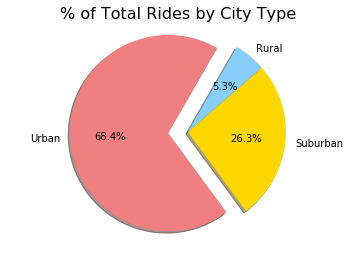

In [65]:
# used merge_df dataframe

# Urban total rides
urban_tot_rides = merge_df.loc[merge_df["type"]=="Urban", "ride_id"].count()

# Suburban total rides
sub_tot_rides = merge_df.loc[merge_df["type"]=="Suburban", "ride_id"].count()

# Rural total rides
rural_tot_rides = merge_df.loc[merge_df["type"]=="Rural", "ride_id"].count()

# Urban % of rides
urban_perc_rides = urban_tot_rides / (urban_tot_rides + sub_tot_rides + rural_tot_rides) * 100

# Suburban % of rides
sub_perc_rides = sub_tot_rides / (urban_tot_rides + sub_tot_rides + rural_tot_rides) * 100

# Rural % of rides
rural_perc_rides = rural_tot_rides / (urban_tot_rides + sub_tot_rides + rural_tot_rides) * 100


labels = ["Urban", "Suburban", "Rural"]
type = [urban_perc_rides, sub_perc_rides, rural_perc_rides]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (.2,0,0)

plt.pie(type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=60)

plt.axis("equal")

plt.title("% of Total Rides by City Type", fontsize=16)

plt.savefig("totalridespie.png")

plt.show()

## Total Drivers by City Type

In [66]:
# INSTRUCTIONS
# Calculate Driver Percents
# Build Pie Charts
# Save Figure


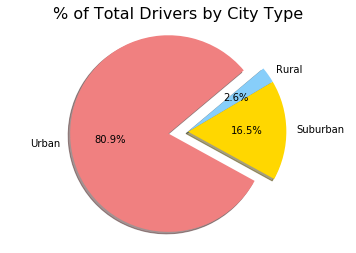

In [67]:
# use city_data dataframe
# city_data.head()

# urban total drivers
urban_tot_drivers = city_data.loc[city_data["Type of City"]=="Urban", "Number of Drivers"].sum()

# suburban total drivers
sub_tot_drivers = city_data.loc[city_data["Type of City"]=="Suburban", "Number of Drivers"].sum()

# rural total drivers
rural_tot_drivers = city_data.loc[city_data["Type of City"]=="Rural", "Number of Drivers"].sum()

# urban percent drivers
urban_perc_drivers = urban_tot_drivers / (urban_tot_drivers + sub_tot_drivers + rural_tot_drivers) *100

# suburban percent drivers
sub_perc_drivers = sub_tot_drivers / (urban_tot_drivers + sub_tot_drivers + rural_tot_drivers) *100

# rural percent drivers
rural_perc_drivers = rural_tot_drivers / (urban_tot_drivers + sub_tot_drivers + rural_tot_drivers) *100

labels = ["Urban", "Suburban", "Rural"]
type = [urban_perc_drivers, sub_perc_drivers, rural_perc_drivers]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (.2,0,0)

plt.pie(type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=40)

plt.axis("equal")

plt.title("% of Total Drivers by City Type", fontsize=16)

plt.savefig("totaldriversspie.png")

plt.show()